In [1]:
from __future__ import print_function
import sys
import os
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
import os
import glob

#matplotlib.rcParams['savefig.dpi'] = 2 * matplotlib.rcParams['savefig.dpi'] # larger image
#matplotlib.rcParams['figure.figsize']= (20.0, 10.0) # larger image


print("Python version:\n{}\n".format(sys.version))
print("matplotlib version: {}".format(matplotlib.__version__))
print("pandas version: {}".format(pd.__version__))
print("numpy version: {}".format(np.__version__))
print("seaborn version: {}".format(sns.__version__))

Python version:
3.7.8 | packaged by conda-forge | (default, Jul 31 2020, 02:25:08) 
[GCC 7.5.0]

matplotlib version: 3.3.3
pandas version: 1.1.4
numpy version: 1.19.4
seaborn version: 0.11.0


### Load the data

In [2]:
root_path = '../2-Run1'  # The path to the directory containing the systems

igbs = ['igb1', 'igb2', 'igb5', 'igb7', 'igb8']  # Each of the systems as named in their directory

ffs = ['ff94','ff96','ff98','ff99', 'ff99SB', 'ff99SBildn', 'ff99SBnmr', 'ff03.r1', 'ff14SB', \
       'ff14SBonlysc','ff14ipq','fb15','ff15ipq']  # The name of the state directories

filename_pattern = 'helicity.dat'  # The glob to match the data files to read

dfs = {}  # Mapping of system name to list of state DataFrames

igbff_all = []
for ff in ffs:
    #igbff_all = []
    for igb in igbs:
        direc=igb + '_'+ ff
        # For each system and state, grab all the data files that match the glob
        file_glob = os.path.join(root_path, direc, filename_pattern)
        files = glob.glob(file_glob)
        for f in files:
            # Read each into a file to be put into a dict
            df = pd.read_csv(f, sep=r'\s+', skiprows=2501, names=['Frame', 'Fraction helicity'])
            df[r'Time ($\mu$s)'] = (df['Frame']-2501)/10000
            df['Helicity (%)'] = df['Fraction helicity']*100*33/31
            df['Mouving average']=pd.Series.rolling(df['Helicity (%)'],window=500,center=False).mean()
            df['Mouving std']=pd.Series.rolling(df['Helicity (%)'],window=500,center=False).std()
            df['av-std']=df['Mouving average']-df['Mouving std']
            df['av+std']=df['Mouving average']+df['Mouving std']
            
            df['igb'] = igb
            df['ff'] = ff
            df['ffigb'] = '{0} {1}'.format(ff, igb)
            df['igbff'] = '{0} {1}'.format(igb, ff)
            igbff_all.append(df)
df_total = pd.concat(igbff_all)
print(df_total.head())

   Frame  Fraction helicity  Time ($\mu$s)  Helicity (%)  Mouving average  \
0   2501              0.818         0.0000     87.077419              NaN   
1   2502              0.879         0.0001     93.570968              NaN   
2   2503              0.848         0.0002     90.270968              NaN   
3   2504              0.818         0.0003     87.077419              NaN   
4   2505              0.848         0.0004     90.270968              NaN   

   Mouving std  av-std  av+std   igb    ff      ffigb      igbff  
0          NaN     NaN     NaN  igb1  ff94  ff94 igb1  igb1 ff94  
1          NaN     NaN     NaN  igb1  ff94  ff94 igb1  igb1 ff94  
2          NaN     NaN     NaN  igb1  ff94  ff94 igb1  igb1 ff94  
3          NaN     NaN     NaN  igb1  ff94  ff94 igb1  igb1 ff94  
4          NaN     NaN     NaN  igb1  ff94  ff94 igb1  igb1 ff94  


In [3]:
print(df_total.tail())

       Frame  Fraction helicity  Time ($\mu$s)  Helicity (%)  Mouving average  \
57495  59996              0.242         5.7495     25.761290        27.079374   
57496  59997              0.152         5.7496     16.180645        27.066600   
57497  59998              0.394         5.7497     41.941935        27.124723   
57498  59999              0.485         5.7498     51.629032        27.176458   
57499  60000              0.424         5.7499     45.135484        27.195832   

       Mouving std     av-std     av+std   igb       ff         ffigb  \
57495    13.735845  13.343529  40.815220  igb8  ff15ipq  ff15ipq igb8   
57496    13.743018  13.323582  40.809618  igb8  ff15ipq  ff15ipq igb8   
57497    13.744355  13.380367  40.869078  igb8  ff15ipq  ff15ipq igb8   
57498    13.787829  13.388629  40.964287  igb8  ff15ipq  ff15ipq igb8   
57499    13.806269  13.389563  41.002101  igb8  ff15ipq  ff15ipq igb8   

              igbff  
57495  igb8 ff15ipq  
57496  igb8 ff15ipq  
57497  i

In [4]:
df_1ns=df_total.iloc[::10]
print(df_1ns.head())

    Frame  Fraction helicity  Time ($\mu$s)  Helicity (%)  Mouving average  \
0    2501              0.818          0.000     87.077419              NaN   
10   2511              0.848          0.001     90.270968              NaN   
20   2521              0.788          0.002     83.883871              NaN   
30   2531              0.848          0.003     90.270968              NaN   
40   2541              0.758          0.004     80.690323              NaN   

    Mouving std  av-std  av+std   igb    ff      ffigb      igbff  
0           NaN     NaN     NaN  igb1  ff94  ff94 igb1  igb1 ff94  
10          NaN     NaN     NaN  igb1  ff94  ff94 igb1  igb1 ff94  
20          NaN     NaN     NaN  igb1  ff94  ff94 igb1  igb1 ff94  
30          NaN     NaN     NaN  igb1  ff94  ff94 igb1  igb1 ff94  
40          NaN     NaN     NaN  igb1  ff94  ff94 igb1  igb1 ff94  


In [5]:
df_10ns=df_total.iloc[::100, :]
df_50ns=df_total.iloc[::500, :]

DSSP value of the fully helical version of the peptide:

In [6]:
90.9*33/31

96.76451612903227

### Helicity time series

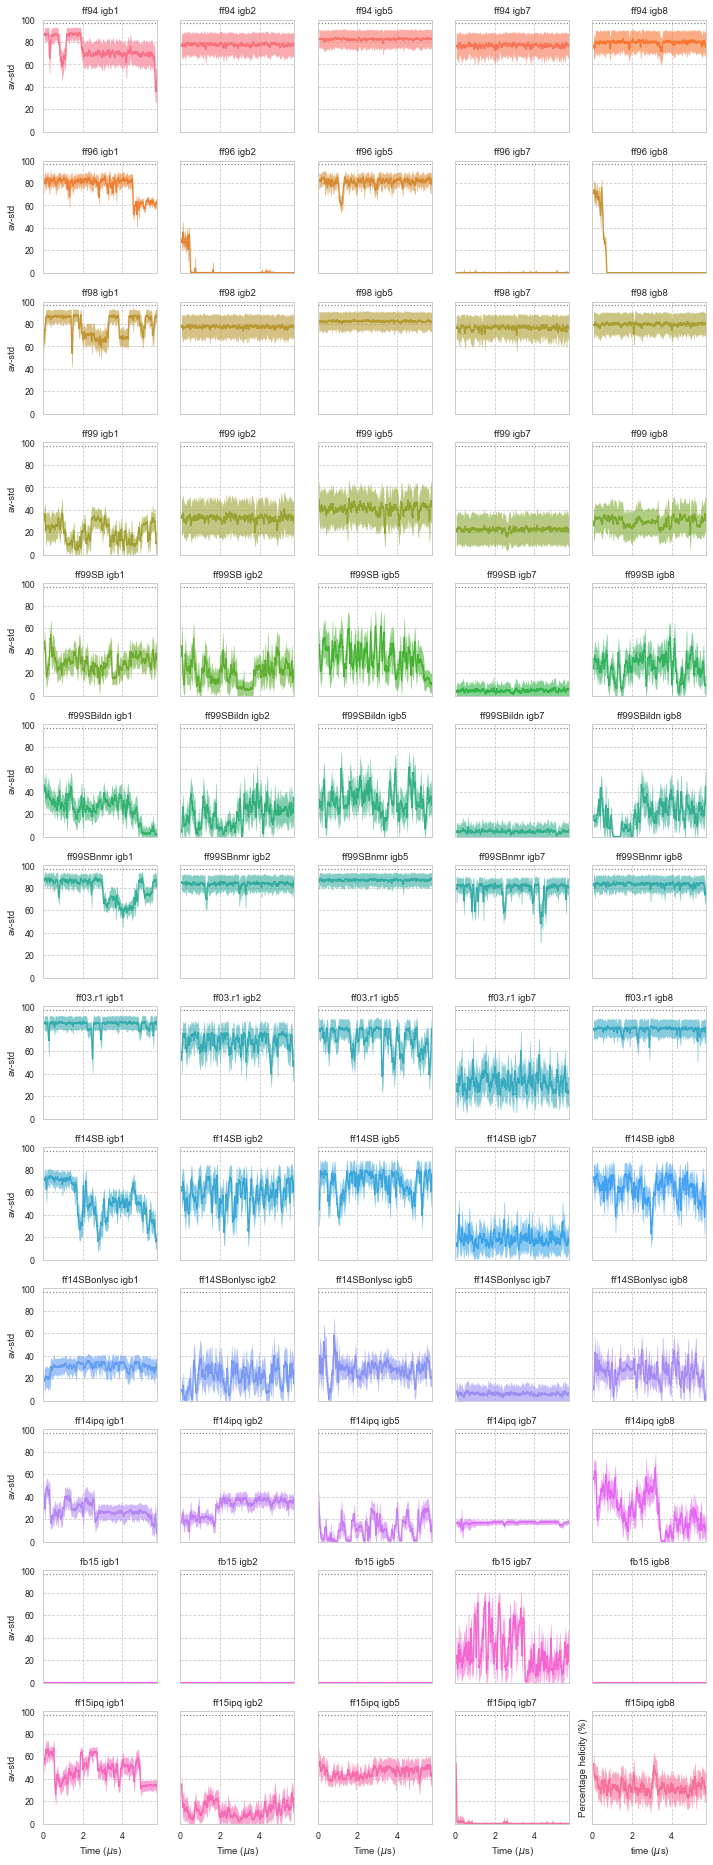

In [9]:
sns.set(context='paper', style='whitegrid', palette='deep', font='sans-serif',\
        font_scale=1, rc={'grid.linestyle': '--'})

grid = sns.FacetGrid(df_total, col="ffigb", col_wrap=5, hue="ffigb", height=2, aspect=1,\
                     sharex=True, sharey=True, despine=False, legend_out=False)


# Draw a horizontal line to show the starting point
grid.map(plt.axhline, y=96.76, ls=":", c=".5") # 90.9*33/31

grid.map(plt.plot, r'Time ($\mu$s)', 'Mouving average').set_titles("{col_name}")
grid.map(plt.fill_between, r'Time ($\mu$s)','av-std', 'av+std', alpha=0.6, lw=0).set_titles("{col_name}")
# Adjust the tick positions and labels
#grid.set(xticks=np.arange(5), yticks=[-3, 3],
         #xlim=(-.5, 4.5), ylim=(-3.5, 3.5))

# Adjust the arrangement of the plots
#grid.fig.tight_layout(w_pad=1)
grid.set(xlim=(0, 5.75) , ylim=(0, 100))
plt.xlabel(r'time ($\mu$s)')
plt.ylabel('Percentage helicity (%)')
plt.tight_layout()
plt.savefig('./plots/helicity4_2.pdf')
plt.savefig('./plots/helicity4_2.png', dpi=300)
plt.show()

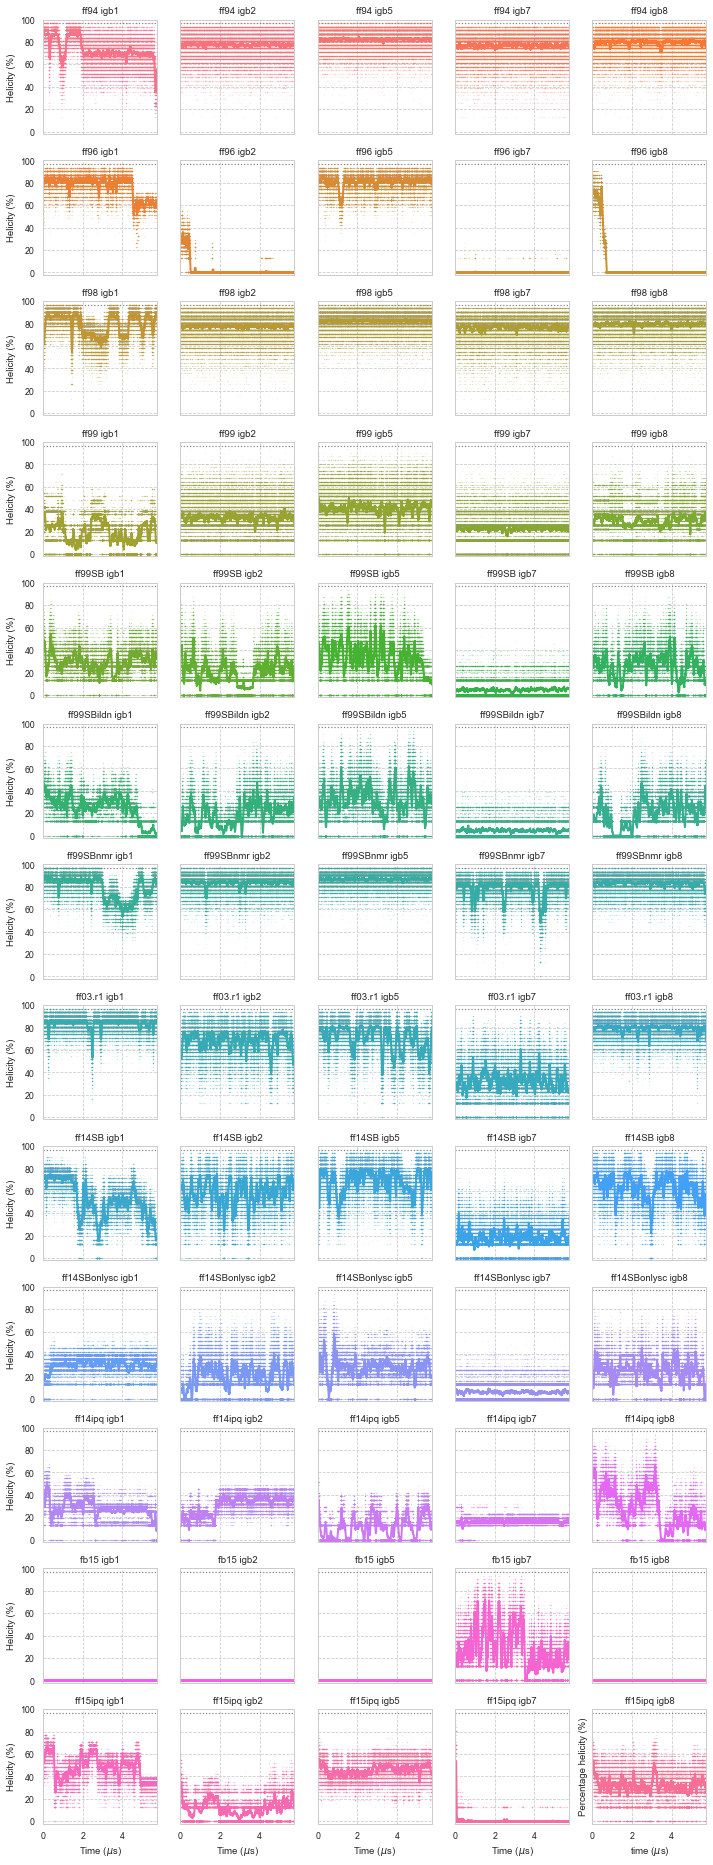

In [12]:
sns.set(context='paper', style='whitegrid', palette='deep', font='sans-serif',\
        font_scale=1, rc={'grid.linestyle': '--'})

grid = sns.FacetGrid(df_total, col="ffigb", col_wrap=5, hue="ffigb", height=2, aspect=1,\
                     sharex=True, sharey=True, despine=False, legend_out=False)


# Draw a horizontal line to show the starting point
grid.map(plt.axhline, y=96.76, ls=":", c=".5") # 90.9*33/31

grid.map(plt.plot, r'Time ($\mu$s)', 'Mouving average', lw=2).set_titles("{col_name}")
grid.map(plt.plot, r'Time ($\mu$s)', 'Helicity (%)', alpha=0.4, ls='',ms=0.2, marker='.').set_titles("{col_name}")
# Adjust the tick positions and labels
#grid.set(xticks=np.arange(5), yticks=[-3, 3],
         #xlim=(-.5, 4.5), ylim=(-3.5, 3.5))

# Adjust the arrangement of the plots
#grid.fig.tight_layout(w_pad=1)
grid.set(xlim=(0, 5.75) , ylim=(-2, 100))
plt.xlabel(r'time ($\mu$s)')
plt.ylabel('Percentage helicity (%)')
plt.savefig('./plots/helicity4_1.pdf')
plt.savefig('./plots/helicity4_1.png', dpi=300)
plt.tight_layout()

### Helicity box plots

In the first plot, wiskers incorporate all the data:

/home/el14718/Software/anaconda3_2019/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 95.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/el14718/Software/anaconda3_2019/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 96.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/el14718/Software/anaconda3_2019/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 97.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/el14718/Software/anaconda3_2019/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 96.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/el1471

KeyboardInterrupt: 

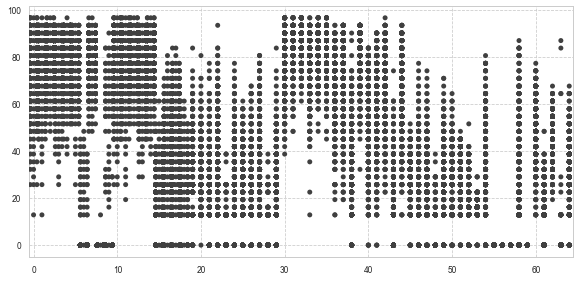

In [14]:
sns.set(context='paper', style='whitegrid', palette='deep', font='sans-serif',\
        font_scale=0.95, rc={'grid.linestyle': '--'})


fig, ax = plt.subplots(figsize=(9.75, 4.6))

ax = sns.swarmplot(x='igbff', y='Helicity (%)', data=df_10ns, color=".25")
ax=sns.boxplot(x='igbff', y='Helicity (%)', data=df_10ns, fliersize=0, linewidth=0.8,
               showmeans=True,
               meanprops={"marker":"o","markerfacecolor":"white", "markeredgecolor":"white","markersize":"3"})
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
ax.set_ylim([0, 100])  
ax.set_xlabel('Implicit solvent / force field combinations')
plt.axhline(y=96.76, ls=":", c=".5" ) # 90.9*33/31
# ax.set_aspect(.25)
plt.tight_layout()

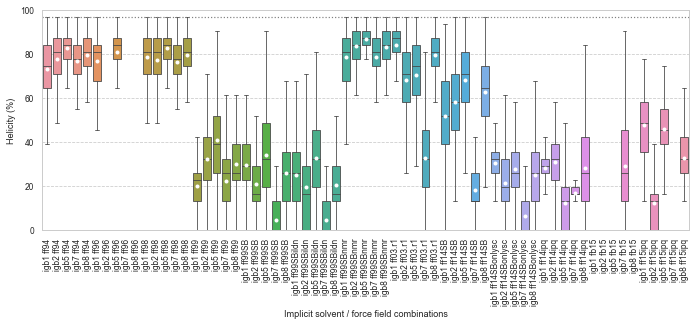

In [17]:
sns.set(context='paper', style='whitegrid', palette='deep', font='sans-serif',\
        font_scale=0.95, rc={'grid.linestyle': '--'})


fig, ax = plt.subplots(figsize=(9.75, 4.6))


ax=sns.boxplot(x='igbff', y='Helicity (%)', data=df_1ns, fliersize=0, linewidth=0.8,
               showmeans=True,
               meanprops={"marker":"o","markerfacecolor":"white", "markeredgecolor":"white","markersize":"3"})
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
ax.set_ylim([0, 100])  
ax.set_xlabel('Implicit solvent / force field combinations')
plt.axhline(y=96.76, ls=":", c=".5" ) # 90.9*33/31
# ax.set_aspect(.25)
plt.tight_layout()

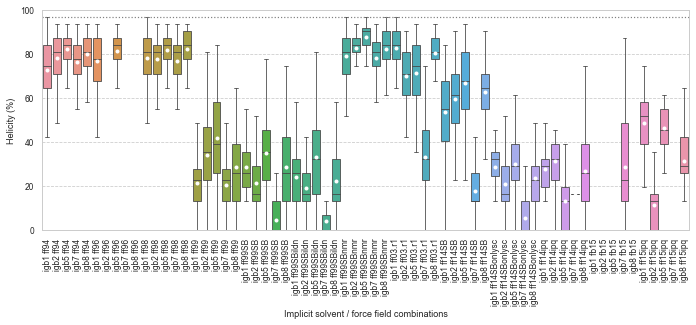

In [18]:
sns.set(context='paper', style='whitegrid', palette='deep', font='sans-serif',\
        font_scale=0.95, rc={'grid.linestyle': '--'})


fig, ax = plt.subplots(figsize=(9.75, 4.6))


ax=sns.boxplot(x='igbff', y='Helicity (%)', data=df_50ns, fliersize=0, linewidth=0.8,
               showmeans=True,
               meanprops={"marker":"o","markerfacecolor":"white", "markeredgecolor":"white","markersize":"3"})
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
ax.set_ylim([0, 100])  
ax.set_xlabel('Implicit solvent / force field combinations')
plt.axhline(y=96.76, ls=":", c=".5" ) # 90.9*33/31
# ax.set_aspect(.25)
plt.tight_layout()

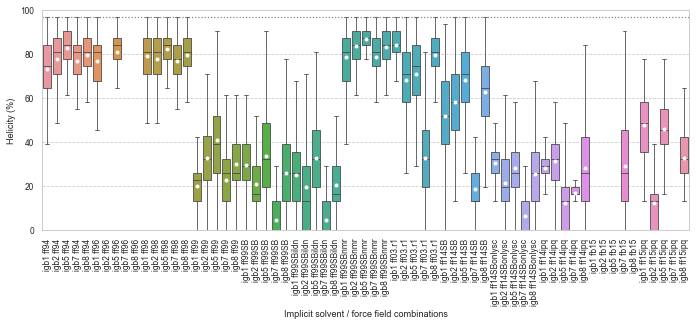

In [10]:
sns.set(context='paper', style='whitegrid', palette='deep', font='sans-serif',\
        font_scale=0.95, rc={'grid.linestyle': '--'})


fig, ax = plt.subplots(figsize=(9.75, 4.6))


ax=sns.boxplot(x='igbff', y='Helicity (%)', data=df_total, fliersize=0, linewidth=0.8,
               showmeans=True,
               meanprops={"marker":"o","markerfacecolor":"white", "markeredgecolor":"white","markersize":"3"})
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
ax.set_ylim([0, 100])  
ax.set_xlabel('Implicit solvent / force field combinations')
plt.axhline(y=96.76, ls=":", c=".5" ) # 90.9*33/31
# ax.set_aspect(.25)
plt.tight_layout()
# plt.savefig('./plots/helicity_boxplot3_1.pdf')
# plt.savefig('./plots/helicity_boxplot3_1.png', dpi=300)

In [21]:
df_total['lag']=1
df_1ns['lag']=10
df_10ns['lag']=100
df_50ns['lag']=500

/home/el14718/Software/anaconda3_2019/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/el14718/Software/anaconda3_2019/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/home/el14718/Software/anaconda3_2019/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of 

In [24]:
df_all=pd.concat([df_total, df_1ns, df_10ns, df_50ns])
df_all

,Frame,Fraction helicity,Time ($\mu$s),Helicity (%),Mouving average,igb,ff,ffigb,igbff,lag
0,2501,0.818,0.0000,87.077419,NaN,igb1,ff94,ff94 igb1,igb1 ff94,1
1,2502,0.879,0.0001,93.570968,NaN,igb1,ff94,ff94 igb1,igb1 ff94,1
2,2503,0.848,0.0002,90.270968,NaN,igb1,ff94,ff94 igb1,igb1 ff94,1
3,2504,0.818,0.0003,87.077419,NaN,igb1,ff94,ff94 igb1,igb1 ff94,1
4,2505,0.848,0.0004,90.270968,NaN,igb1,ff94,ff94 igb1,igb1 ff94,1
...,...,...,...,...,...,...,...,...,...,...
55000,57501,0.485,5.5000,51.629032,33.961471,igb8,ff15ipq,ff15ipq igb8,igb8 ff15ipq,500
55500,58001,0.242,5.5500,25.761290,40.016013,igb8,ff15ipq,ff15ipq igb8,igb8 ff15ipq,500
56000,58501,0.333,5.6000,35.448387,37.384529,igb8,ff15ipq,ff15ipq igb8,igb8 ff15ipq,500
56500,59001,0.273,5.6500,29.061290,32.667232,igb8,ff15ipq,ff15ipq igb8,igb8 ff15ipq,500


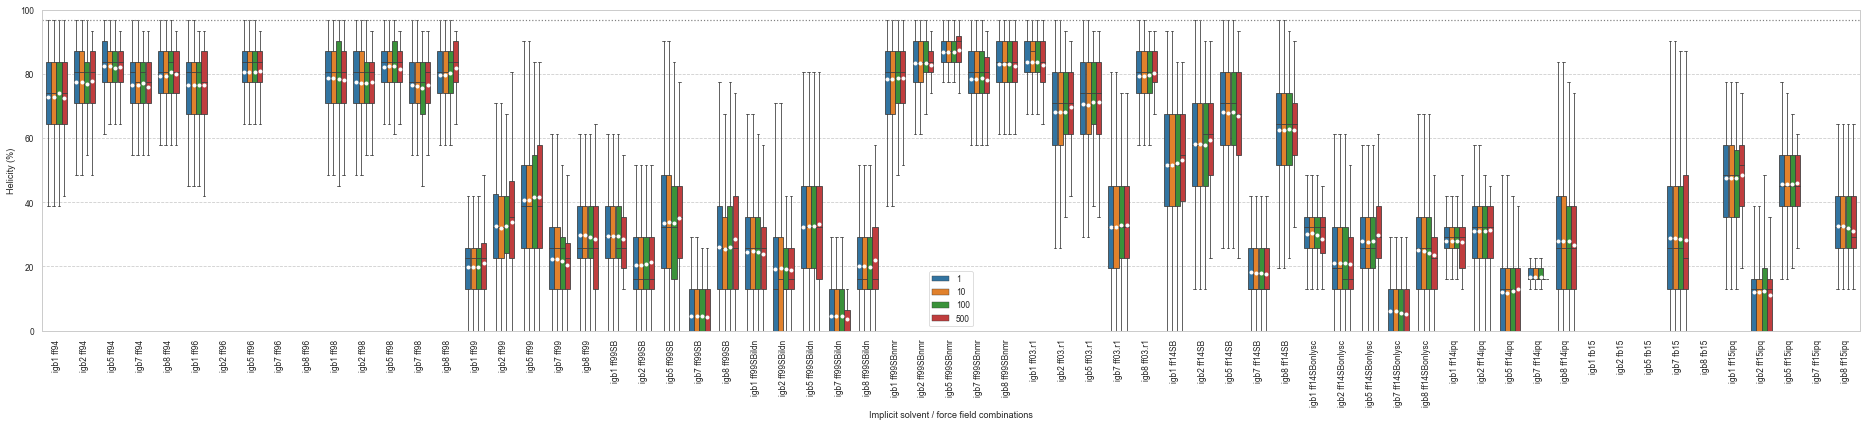

In [34]:
sns.set(context='paper', style='whitegrid', palette=sns.color_palette("tab10"), font='sans-serif',\
        font_scale=0.95, rc={'grid.linestyle': '--'})


fig, ax = plt.subplots(figsize=(26, 6))


ax=sns.boxplot(x='igbff', y='Helicity (%)', hue='lag', data=df_all, fliersize=0, linewidth=0.8,
               showmeans=True, dodge=True, width=.75,
               meanprops={"marker":"o","markerfacecolor":"white", "markeredgecolor":"white","markersize":"3"})
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
ax.set_ylim([0, 100])  
ax.set_xlabel('Implicit solvent / force field combinations')
ax.legend(loc='lower center')
plt.axhline(y=96.76, ls=":", c=".5" ) # 90.9*33/31
# ax.set_aspect(.25)
plt.tight_layout()
plt.savefig('./plots/helicity_boxplot4_1.pdf')
plt.savefig('./plots/helicity_boxplot4_1.png', dpi=300)

#### Average helicity and std dev

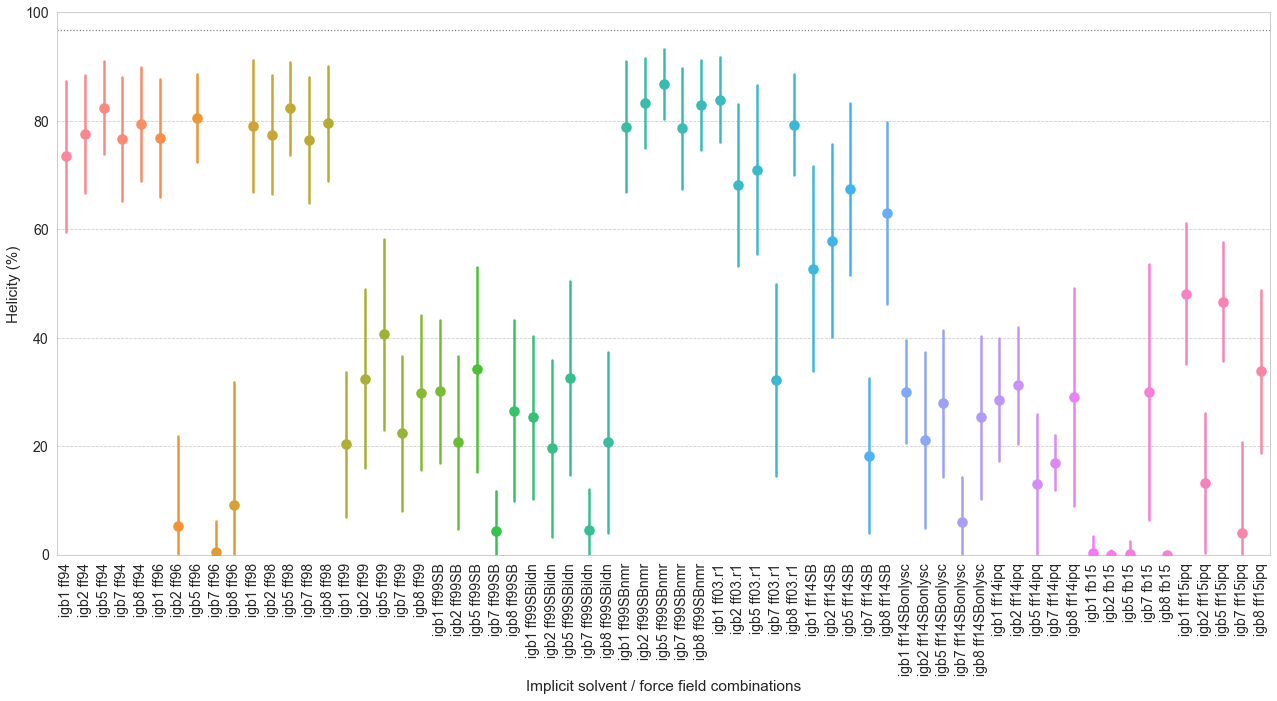

In [30]:
sns.set(context='paper', style='whitegrid', palette='deep', font='sans-serif',\
        font_scale=1.6, rc={'grid.linestyle': '--'})

fig, axes = plt.subplots(figsize=(18, 10))

ax=sns.pointplot(x='igbff', y='Helicity (%)', data=df_total, hue="igbff", join=False, ci="sd",
                markers="o", scale = 1.5, errwidth=2.5)

ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
ax.set_ylim([0, 100])  
ax.set_xlabel('Implicit solvent / force field combinations')
ax.get_legend().remove()
plt.axhline(y=96.76, ls=":", c=".5" ) # 90.9*33/31

plt.tight_layout()
plt.savefig('./plots/helicity_mean_sd.png', dpi=400)

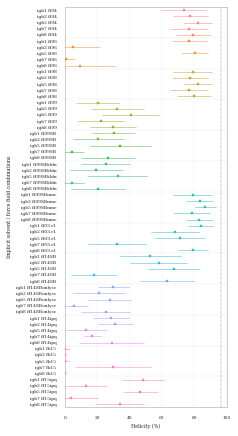

In [68]:
sns.set(context='paper', style='whitegrid', palette='deep', font='serif',\
        font_scale=0.5, rc={'grid.linestyle': '--','grid.linewidth': '0.2'})

fig, axes = plt.subplots(figsize=(3.25, 6))

ax=sns.pointplot(y='igbff', x='Helicity (%)', data=df_total, hue="igbff", join=False, ci="sd",
                markers="s", orient="h", scale=0.25, errwidth=0.5)

ax.set_xlim([0, 100])  
ax.set_ylabel('Implicit solvent / force field combinations')
ax.get_legend().remove()
ax.yaxis.grid(True, which='minor')

plt.axvline(x=96.76, ls='-.', c=".5",lw=0.4 ) # 90.9*33/31

plt.axhline(y=4.5, ls='--', c=".75",lw=0.2 )
plt.axhline(y=9.5, ls='--', c=".75",lw=0.2 )
plt.axhline(y=14.5, ls='--', c=".75",lw=0.2 )
plt.axhline(y=19.5, ls='--', c=".75",lw=0.2 )
plt.axhline(y=24.5, ls='--', c=".75",lw=0.2 )
plt.axhline(y=29.5, ls='--', c=".75",lw=0.2 )
plt.axhline(y=34.5, ls='--', c=".75",lw=0.2 )
plt.axhline(y=39.5, ls='--', c=".75",lw=0.2 )
plt.axhline(y=44.5, ls='--', c=".75",lw=0.2 )
plt.axhline(y=49.5, ls='--', c=".75",lw=0.2 )
plt.axhline(y=54.5, ls='--', c=".75",lw=0.2 )
plt.axhline(y=59.5, ls='--', c=".75",lw=0.2 )

plt.tight_layout()
plt.savefig('./plots/helicity_mean_sd_2.png', dpi=400)

In [ ]:
sns.set(context='paper', style='whitegrid', palette='deep', font='sans-serif',\
        font_scale=1.6, rc={'grid.linestyle': '--'})

fig, ax = plt.subplots(figsize=(18, 10))

g=sns.catplot(x='ff', y='Helicity (%)', data=df_total, hue="igb", kind='bar')
#                join=False, ci="sd",
#                 markers="o", scale = 1.5, errwidth=2.5)

# ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
# g.set_ylim([0, 100])  
# g.set_xlabel('Implicit solvent / force field combinations')
# g.get_legend().remove()
# plt.axhline(y=96.76, ls=":", c=".5" ) # 90.9*33/31

plt.tight_layout()
# plt.savefig('./plots/helicity_mean_sd_3.png', dpi=400)

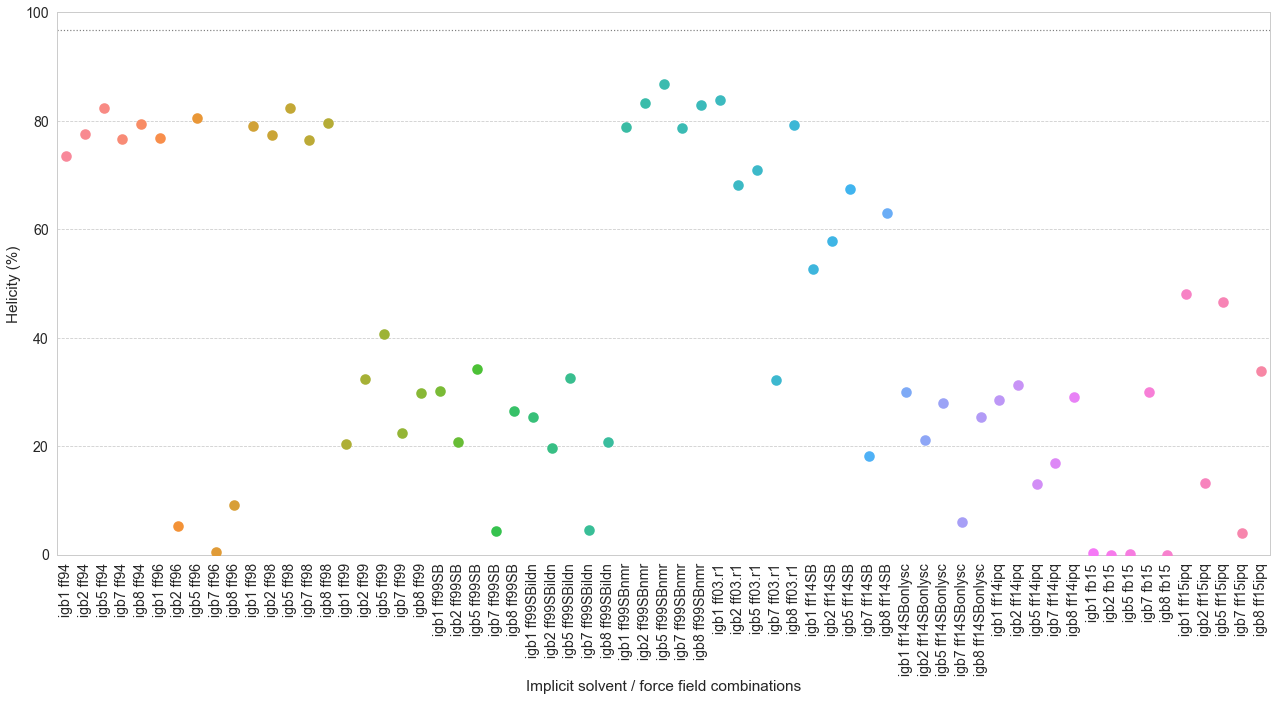

In [66]:
sns.set(context='paper', style='whitegrid', palette='deep', font='serif',\
        font_scale=0.5, rc={'grid.linestyle': '--','grid.linewidth': '0.2'})

fig, axes = plt.subplots(figsize=(3.25, 6))

ax=sns.pointplot(y='igbff', x='Helicity (%)', data=df_total, hue="igbff", join=False, ci="sd",
                markers="s", orient="h", scale=0.25, errwidth=0.5)

ax.set_xlim([0, 100])  
ax.set_ylabel('Implicit solvent / force field combinations')
ax.get_legend().remove()
ax.yaxis.grid(True, which='minor')

plt.axvline(x=96.76, ls='-.', c=".5",lw=0.4 ) # 90.9*33/31

plt.axhline(y=4.5, ls='--', c=".75",lw=0.2 )
plt.axhline(y=9.5, ls='--', c=".75",lw=0.2 )
plt.axhline(y=14.5, ls='--', c=".75",lw=0.2 )
plt.axhline(y=19.5, ls='--', c=".75",lw=0.2 )
plt.axhline(y=24.5, ls='--', c=".75",lw=0.2 )
plt.axhline(y=29.5, ls='--', c=".75",lw=0.2 )
plt.axhline(y=34.5, ls='--', c=".75",lw=0.2 )
plt.axhline(y=39.5, ls='--', c=".75",lw=0.2 )
plt.axhline(y=44.5, ls='--', c=".75",lw=0.2 )
plt.axhline(y=49.5, ls='--', c=".75",lw=0.2 )
plt.axhline(y=54.5, ls='--', c=".75",lw=0.2 )
plt.axhline(y=59.5, ls='--', c=".75",lw=0.2 )

plt.tight_layout()
plt.savefig('./plots/helicity_mean_sd_4.png', dpi=400)